In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def simulation_epidemie(lambda_, beta_, mu_, T, N):
    # Valeur initales
    S = [0.7]
    I = [0.3]
    R = [0]
    P = [1]

    # Variation du temps
    dt = T / (N-1)
    t = np.linspace(0, T, N)

    # Traitement
    for i in range(0, N-1):
        S_next = S[i] - (dt * beta_ * I[i] * S[i])
        S.append(S_next)
        I_next = I[i] + dt*((beta_ * I[i] * S[i]) - (I[i]/lambda_) - (mu_*I[i]))
        I.append(I_next)
        R_next = R[i] + dt*(I[i]/lambda_)
        R.append(R_next)
        P.append(S_next + I_next + R_next)

    # plot
    plt.figure(figsize=(20,12))
    plt.plot(t, S, "-b", label="Population Saine")
    plt.plot(t, I, "-r", label="Population Infectée")
    plt.plot(t, R, "-g", label="Population Retablie")
    plt.plot(t, P, "-y", label="Population Totale")
    plt.legend(loc='upper right')
    plt.grid()

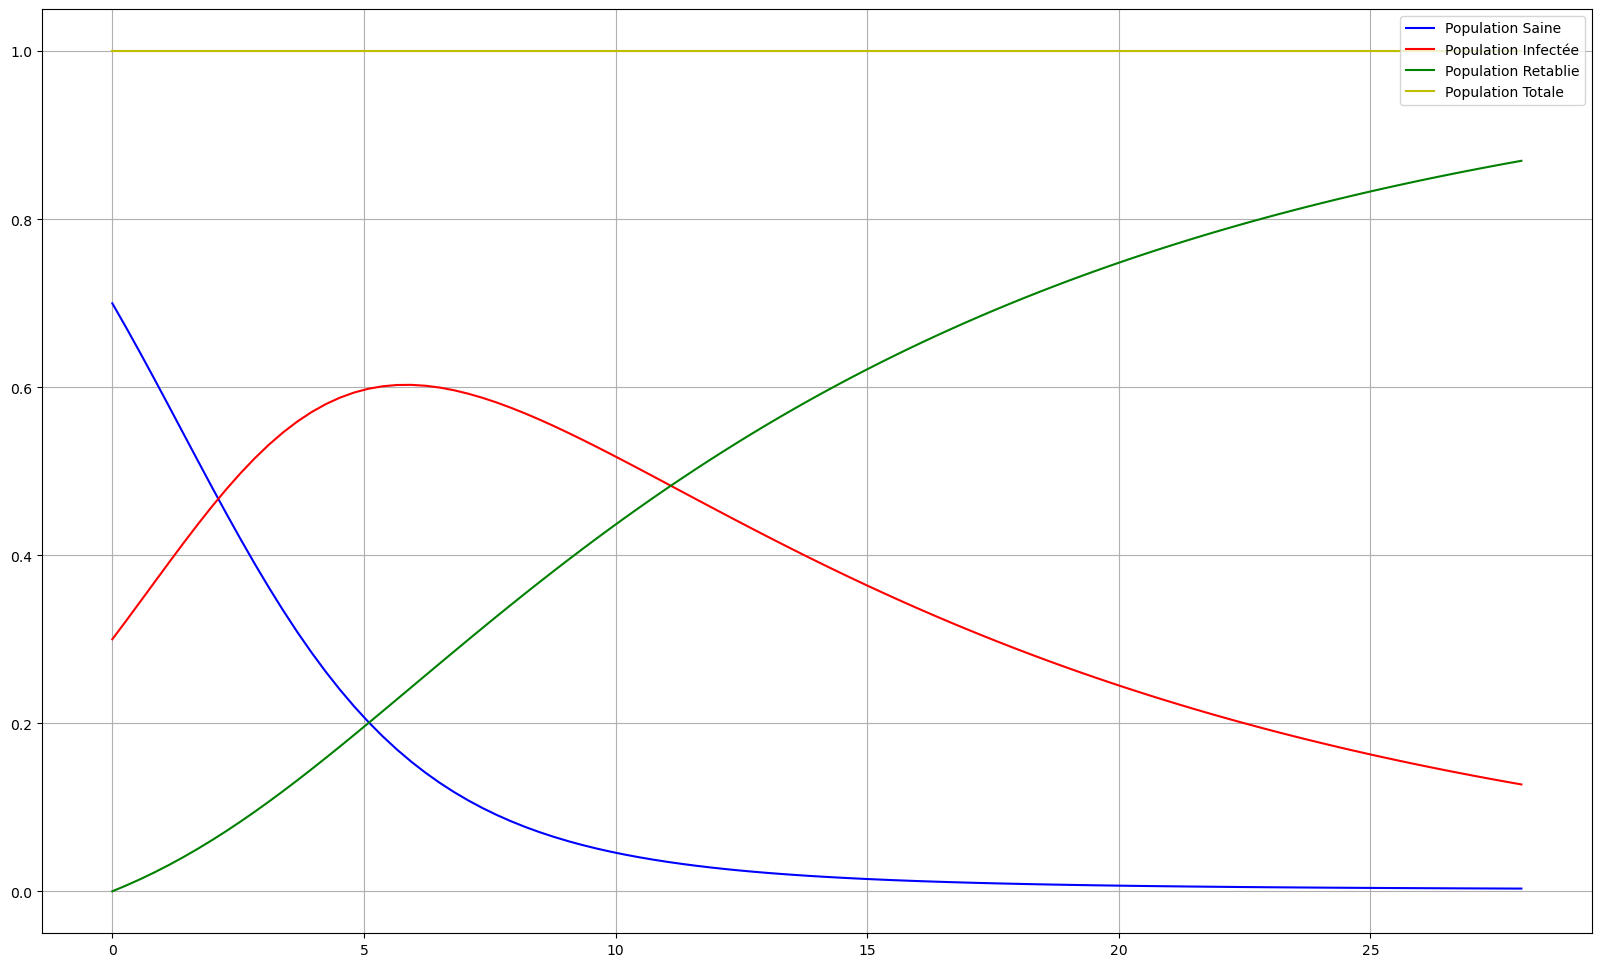

In [5]:
simulation_epidemie(12, 0.5, 0, 28, 100)

In [6]:
# SIMLAB

In [ ]:
# Install requirements
#! pip install ipywidgets
#! jupyter nbextension enable --py widgetsnbextension

# For dynamique simulation
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets

# Create interactive sliders for parameters
interact(simulation_epidemie, 
    lambda_=widgets.FloatSlider(min=0.1, max=50, step=0.1, value=12),
    beta_=widgets.FloatSlider(min=0.1, max=1.0, step=0.1, value=0.5),
    mu_=widgets.FloatSlider(min=0.01, max=1.0, step=0.1, value=0),
    T=widgets.FloatSlider(min=1, max=31, step=1, value=28),
    N=widgets.IntSlider(min=10, max=100, step=10, value=90))